In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import prim
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
from newshiftedColorMap import *

In [3]:
orig_cmap = matplotlib.cm.coolwarm
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.75, name='shifted')
shrunk_cmap = shiftedColorMap(orig_cmap, start=0.15, midpoint=0.75, stop=0.85, name='shrunk')


In [4]:
%matplotlib inline

In [5]:
sns.set_context("notebook",rc={"font.size": 18})
sns.set_style("whitegrid")

In [4]:
inputs=pd.read_csv("uncertainties_2options.csv")
outputs=pd.read_csv("results_2options.csv")

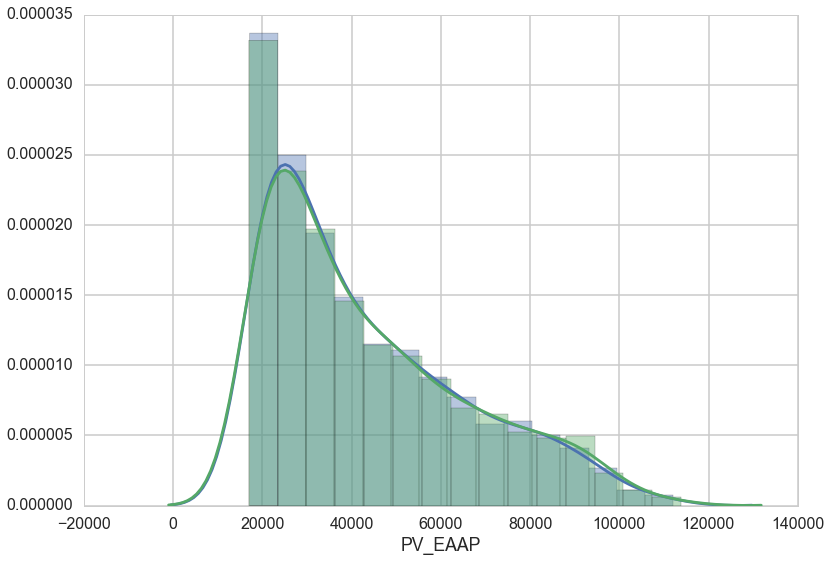

In [5]:
sns.distplot(outputs[inputs.policy=="option 7"].PV_EAAP)
sns.distplot(outputs[inputs.policy=="option 8"].PV_EAAP)

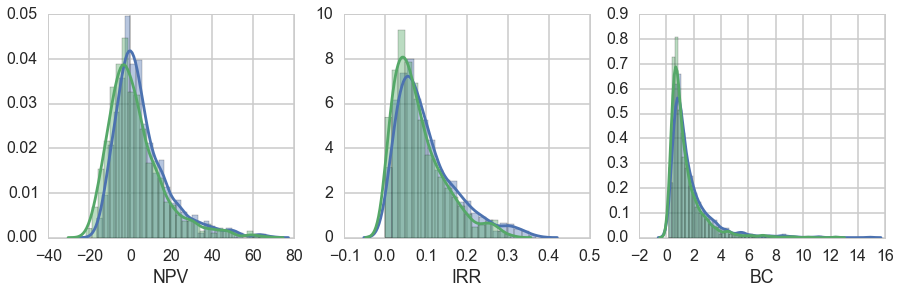

In [14]:
fig = plt.figure(figsize=(15,4))
plt.subplot(131)
sns.distplot(outputs[inputs.policy=="option 7"].NPV)
sns.distplot(outputs[inputs.policy=="option 8"].NPV)
plt.subplot(132)
sns.distplot(outputs[inputs.policy=="option 7"].loc[outputs.IRR>0,'IRR'])
sns.distplot(outputs[inputs.policy=="option 8"].loc[outputs.IRR>0,'IRR'])
plt.subplot(133)
sns.distplot(outputs[inputs.policy=="option 7"].BC)
sns.distplot(outputs[inputs.policy=="option 8"].BC)

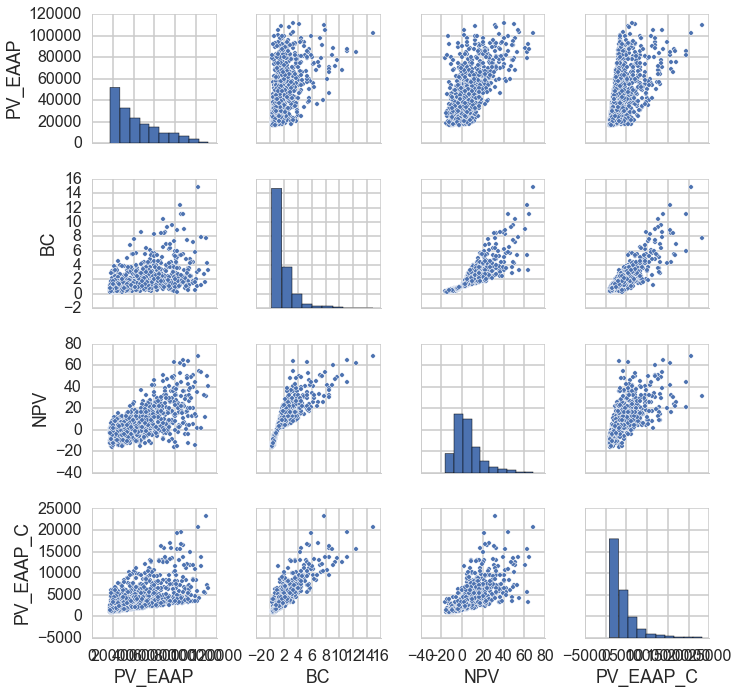

In [15]:
sns.pairplot(outputs[inputs.policy=="option 7"].drop("IRR",axis=1))

In [18]:
%matplotlib inline

C:\Miniconda3\lib\site-packages\matplotlib\collections.py:355: UserWarning: Collection picker None could not be converted to float
  % self._picker)


AWA = AWAWO+something uncertain for assets and population

In [17]:
p = prim.Prim(inputs, outputs[inputs.policy=="option 7"].NPV>0, threshold=0.5, threshold_type=">")

box = p.find_box()
box.show_tradeoff()

plt.show()

In [19]:
box.select(11)

In [20]:
print(box)

Box 1 [Peeling Trajectory 11]
    Stats
        Coverage: 0.767947
        Density:  0.814159
        Mass:     0.565000
        Res Dim:  3.000000
        Mean:     0.814159
    Limits
                     min       max     qp values
        COSTAG  0.300664  1.426179  1.466493e-16
        D       0.000070  0.108267  2.678867e-03
        AVAWO  -0.008358  0.019978  1.400071e-01


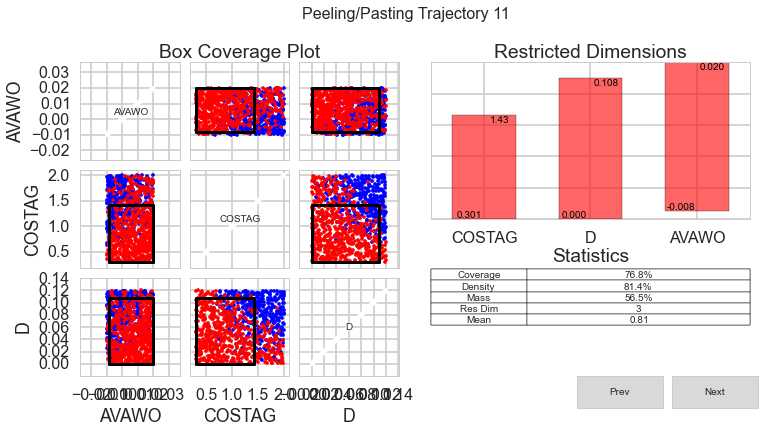

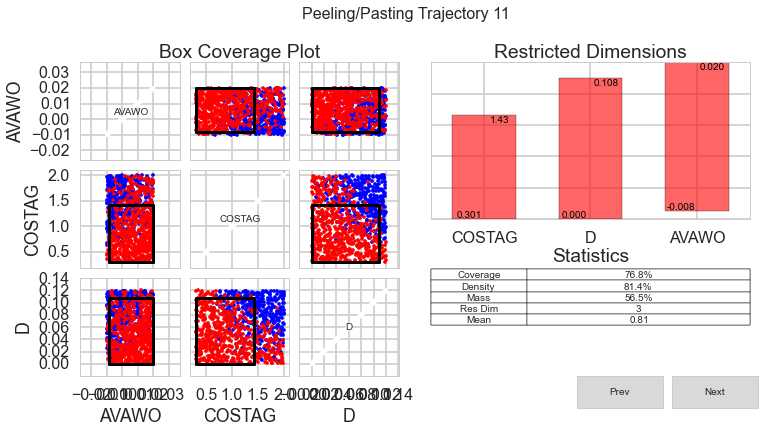

In [22]:
box.show_details()

In [31]:
inputs.columns

Index(['AVA', 'AVAWO', 'COSTAG', 'D', 'INTANGD', 'ITD', 'POPwith', 'POPwo',
       'SLRindex', 'model', 'policy'],
      dtype='object')

In [42]:
outputs.columns

Index(['PV_EAAP', 'IRR', 'BC', 'NPV', 'PV_EAAP_C'], dtype='object')

In [32]:
b = pd.concat([inputs,outputs],axis=1)

In [47]:
#option 8 - option 7

In [44]:
c = b.groupby(['AVA', 'AVAWO', 'COSTAG', 'D', 'INTANGD', 'ITD', 'POPwith', 'POPwo','SLRindex']).apply(lambda x:x[['PV_EAAP', 'IRR', 'BC', 'NPV', 'PV_EAAP_C']].diff())

In [55]:
outputs.iloc[0,:]-outputs.iloc[1001,:]

PV_EAAP      7556.099096
IRR             0.017342
BC              0.412001
NPV            10.381600
PV_EAAP_C     241.211261
dtype: float64

In [48]:
c.dropna(inplace=True)

In [54]:
c.describe()

,PV_EAAP,IRR,BC,NPV,PV_EAAP_C
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,340.946583,-2.790874e+07,-0.309566,-3.060642,-534.732796
std,1646.650099,2.433013e+08,0.275213,1.222594,422.702368
min,-3995.602852,-2.146826e+09,-2.514417,-6.614100,-3680.375191
25%,-191.240643,-2.752456e-02,-0.375499,-3.819075,-651.671671
50%,-98.084297,-1.921380e-02,-0.219392,-2.932600,-404.583609
75%,424.934457,-1.515990e-02,-0.142954,-2.139175,-265.767464
max,11937.243764,0.000000e+00,-0.040141,-0.768500,-106.037641


In [69]:
sum(c.PV_EAAP<0)/len(c)

0.58999999999999997

In [87]:
sum((inputs.iloc[0:1000,:].SLRindex>2.5)&(inputs.iloc[0:1000,:].D>0.022))/len(c)

0.28000000000000003

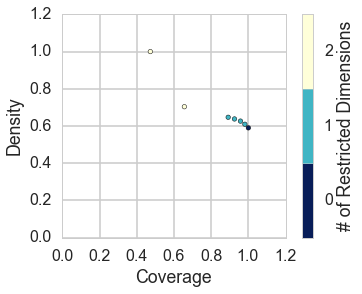

In [65]:
p = prim.Prim(inputs.iloc[0:1000,:], c.PV_EAAP<0, threshold=0.5, threshold_type=">")

box = p.find_box()
box.show_tradeoff()

plt.show()

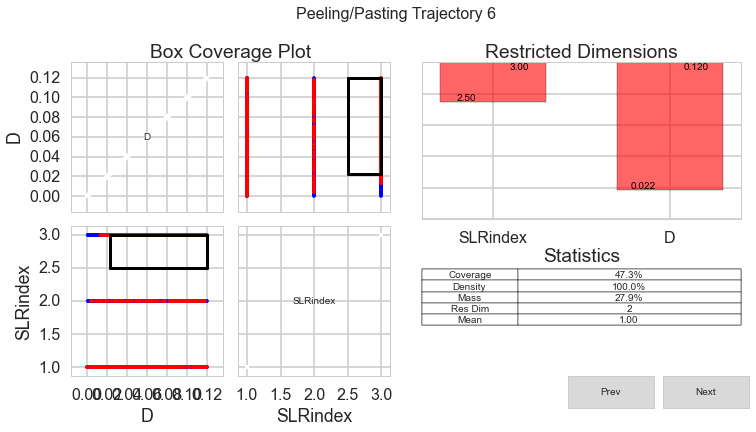

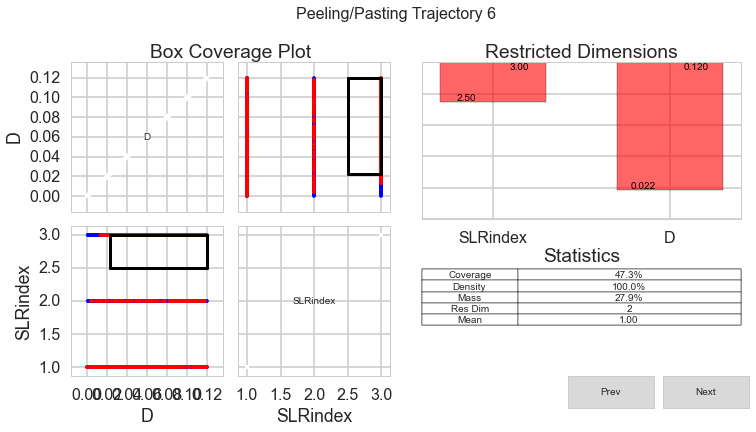

In [74]:
box.select(6)
box.show_details()

In [75]:
print(box)

Box 1 [Peeling Trajectory 6]
    Stats
        Coverage: 0.472881
        Density:  1.000000
        Mass:     0.279000
        Res Dim:  2.000000
        Mean:     1.000000
    Limits
                       min       max     qp values
        SLRindex  2.500000  3.000000  1.736842e-53
        D         0.022442  0.119944  3.119787e-16


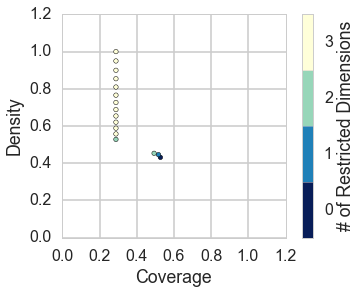

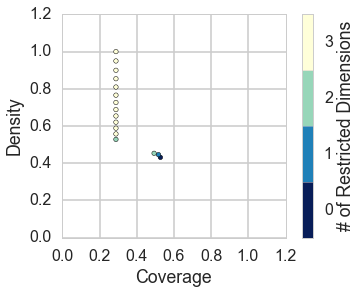

In [76]:
box = p.find_box()
box.show_tradeoff()

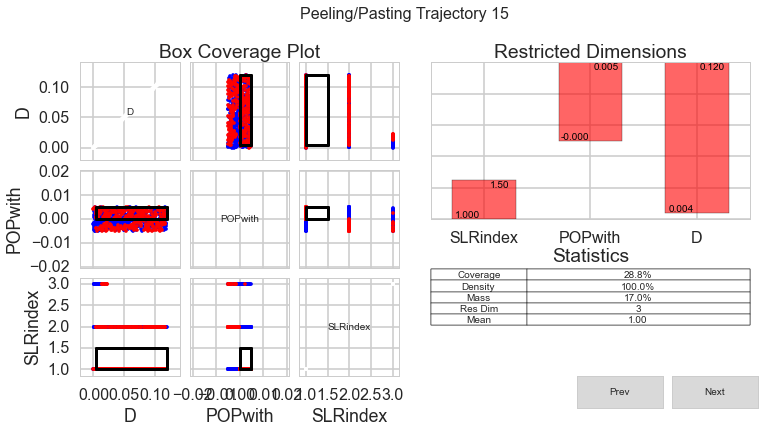

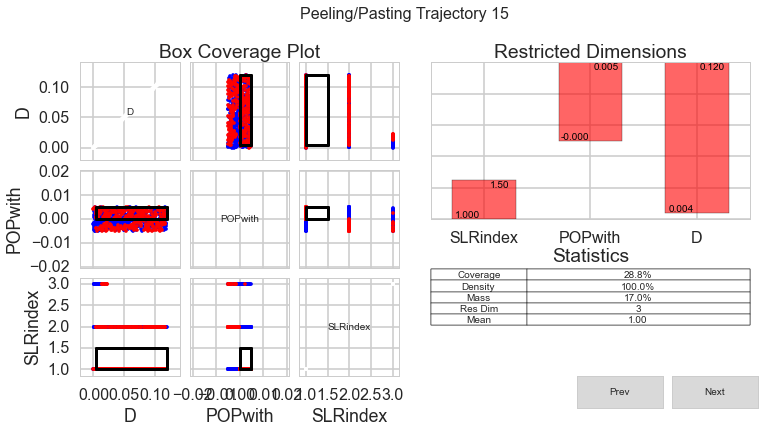

In [82]:
box.select(15)
box.show_details()

In [83]:
print(box)

Box 2 [Peeling Trajectory 15]
    Stats
        Coverage: 0.288136
        Density:  1.000000
        Mass:     0.170000
        Res Dim:  3.000000
        Mean:     1.000000
    Limits
                       min       max     qp values
        SLRindex  1.000000  1.500000  7.291873e-55
        POPwith  -0.000006  0.004990  6.931360e-48
        D         0.004415  0.119944  1.000000e+00


In [9]:
%matplotlib inline

In [6]:
p2 = prim.Prim(inputs, outputs.BC>2, threshold=0.5, threshold_type=">")

box2 = p2.find_box()
box2.show_tradeoff()

plt.show()

In [8]:
box2.select(18)

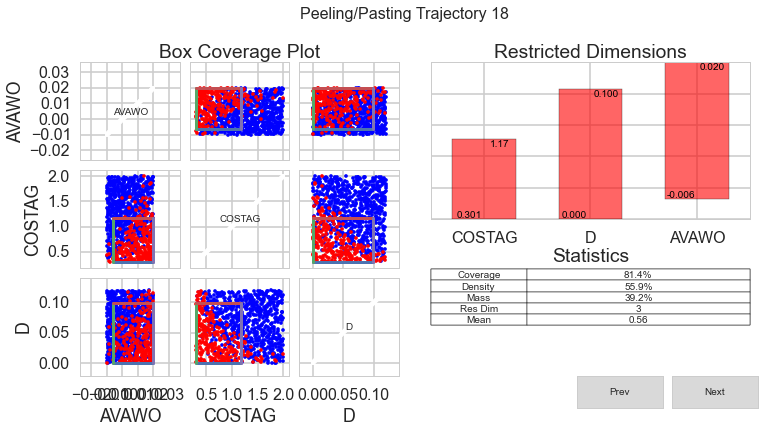

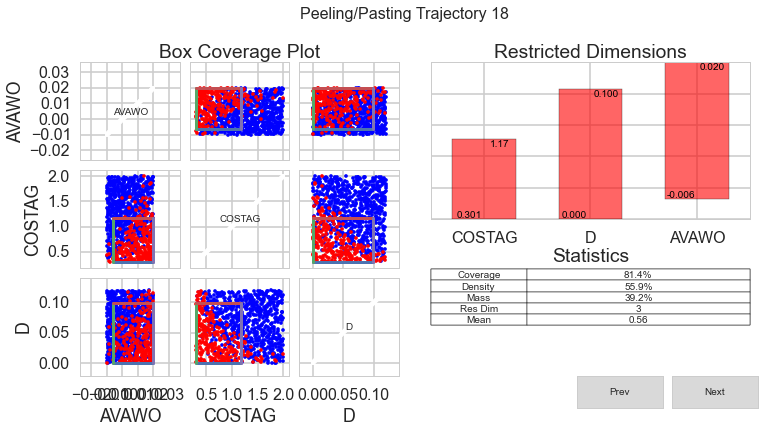

In [10]:
box2.show_details()

In [11]:
print(box2)

Box 1 [Peeling Trajectory 18]
    Stats
        Coverage: 0.814126
        Density:  0.558673
        Mass:     0.392000
        Res Dim:  3.000000
        Mean:     0.558673
    Limits
                     min       max     qp values
        COSTAG  0.301295  1.167055  3.641761e-18
        D       0.000012  0.099593  2.424290e-02
        AVAWO  -0.006153  0.019978  5.056047e-02


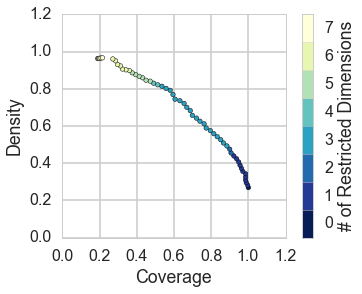

In [12]:
p3 = prim.Prim(inputs, (outputs.NPV>0)&(outputs.BC>2), threshold=0.5, threshold_type=">")

box3 = p3.find_box()
box3.show_tradeoff()

plt.show()

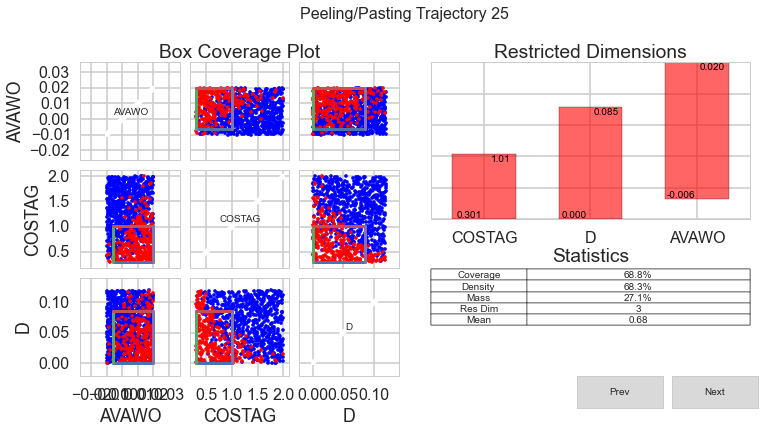

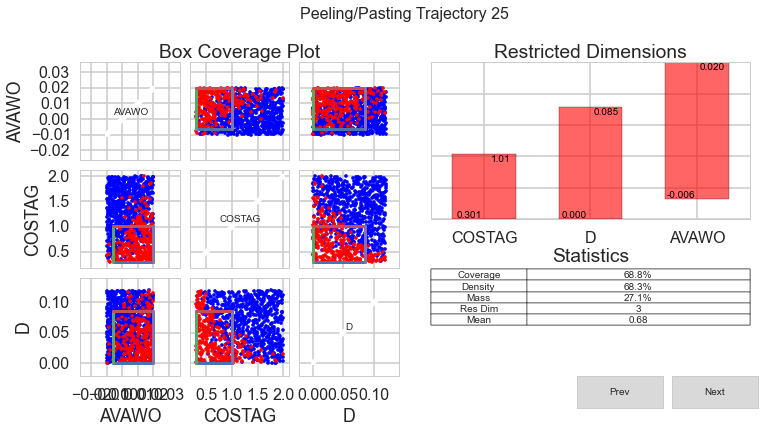

In [15]:
box3.select(25)
box3.show_details()

In [16]:
print(box3)

Box 1 [Peeling Trajectory 25]
    Stats
        Coverage: 0.687732
        Density:  0.682657
        Mass:     0.271000
        Res Dim:  3.000000
        Mean:     0.682657
    Limits
                     min       max     qp values
        COSTAG  0.301295  1.005884  7.009193e-24
        D       0.000012  0.085417  1.065291e-04
        AVAWO  -0.006153  0.019978  4.824671e-02


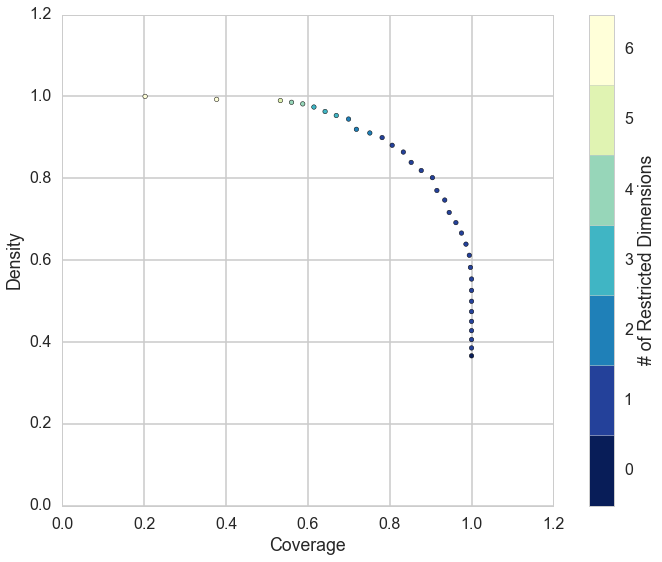

In [20]:
p4 = prim.Prim(inputs, (outputs.IRR>0.1), threshold=0.5, threshold_type=">")

box4 = p4.find_box()
box4.show_tradeoff()

plt.show()

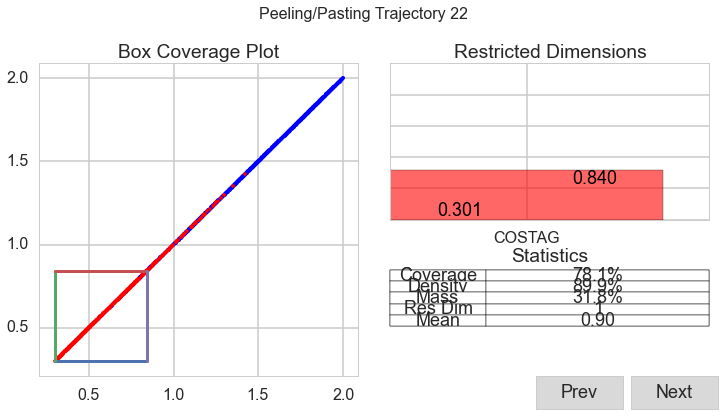

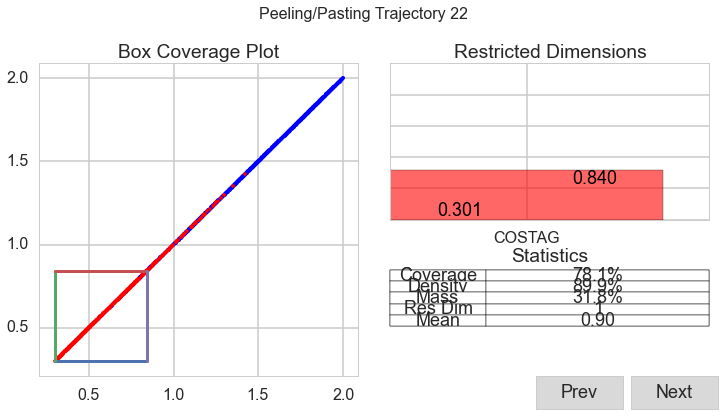

In [25]:
box4.select(22)
box4.show_details()

In [27]:
inputs8=pd.read_csv("uncertainties_option8.csv")
outputs8=pd.read_csv("results_option8.csv")

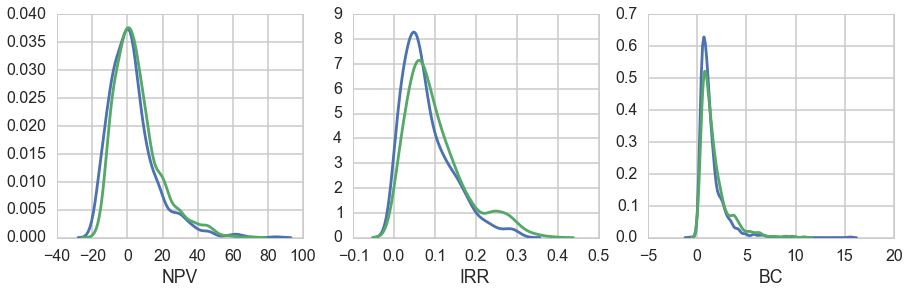

In [31]:
fig = plt.figure(figsize=(15,4))
plt.subplot(131)
sns.distplot(outputs8.NPV,hist=False)
sns.distplot(outputs.NPV,hist=False)
plt.subplot(132)
sns.distplot(outputs8.loc[outputs8.IRR>0,'IRR'],hist=False)
sns.distplot(outputs.loc[outputs.IRR>0,'IRR'],hist=False)
plt.subplot(133)
sns.distplot(outputs8.BC,hist=False)
sns.distplot(outputs.BC,hist=False)

In [33]:
inputs

,AVA,AVAWO,COSTAG,D,INTANGD,ITD,POPwith,POPwo,SLRindex,model,policy
0,0.012907,0.004567,0.671873,0.046835,0.330344,0.932156,0.004290,-0.002856,3,OPTION7,None
1,0.007630,-0.000055,0.811466,0.019459,0.417036,0.288834,-0.003659,-0.003441,2,OPTION7,None
2,0.009594,0.003864,0.884287,0.000012,0.281154,0.207564,0.000448,0.001272,1,OPTION7,None
3,-0.000365,-0.007650,1.750029,0.026652,0.469820,0.576023,0.002989,-0.001334,1,OPTION7,None
4,0.008657,0.004662,1.277704,0.102181,0.157158,0.819251,-0.000561,-0.003650,1,OPTION7,None
5,-0.001228,0.003177,1.604699,0.025633,0.620450,0.248146,0.000206,0.003512,2,OPTION7,None
6,-0.002177,0.003621,1.595172,0.118086,0.581199,0.977383,-0.002731,-0.001376,3,OPTION7,None
7,0.006641,0.007155,0.821825,0.050215,0.387804,0.671432,0.001140,0.000055,3,OPTION7,None
8,0.013322,0.007953,0.339700,0.094312,0.357194,0.340621,0.000438,0.004207,3,OPTION7,None
9,-0.009585,0.007406,1.906010,0.052913,0.667749,0.103369,-0.003413,-0.000055,2,OPTION7,None
